## Análisis Exploratorio de datos

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

In [3]:
lendingclub = pd.read_csv('./data/01_raw_general.csv', sep = ',')
lendingclub.head()

C:\Users\nacho\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,112436985,NaN,6025.0,6025.0,6025.0,36 months,15.05%,209.01,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,112439006,NaN,20400.0,20400.0,20400.0,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,112438929,NaN,13000.0,13000.0,13000.0,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Valores perdidos

In [4]:
nacolumnas = pd.DataFrame(lendingclub.isna().sum(), columns = ['Valores NaN']).sort_values(['Valores NaN'], ascending = False)
pd.set_option('display.max_rows', nacolumnas.shape[0]+1)
nacolumnas

,Valores NaN
member_id,884876
orig_projected_additional_accrued_interest,882607
hardship_end_date,882215
hardship_amount,882215
hardship_type,882215
hardship_reason,882215
hardship_status,882215
hardship_last_payment_amount,882215
hardship_payoff_balance_amount,882215
hardship_loan_status,882215


### Variable Target

La variable objetivo en este trabajo es `Loan Status`. Vamos a estudiar todos los status.

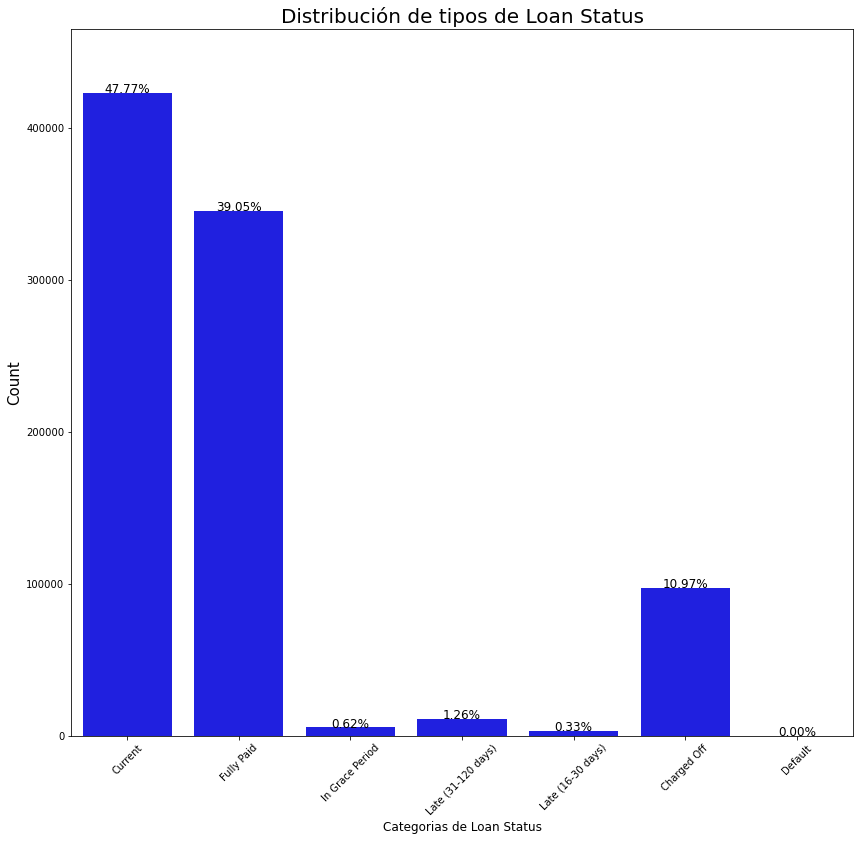

In [40]:
total = len(lendingclub)
plt.figure(figsize = (14,13))
g = sns.countplot(x="loan_status", data=lendingclub, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Categorias de Loan Status", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Distribución de tipos de Loan Status", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

### Propósito del crédito

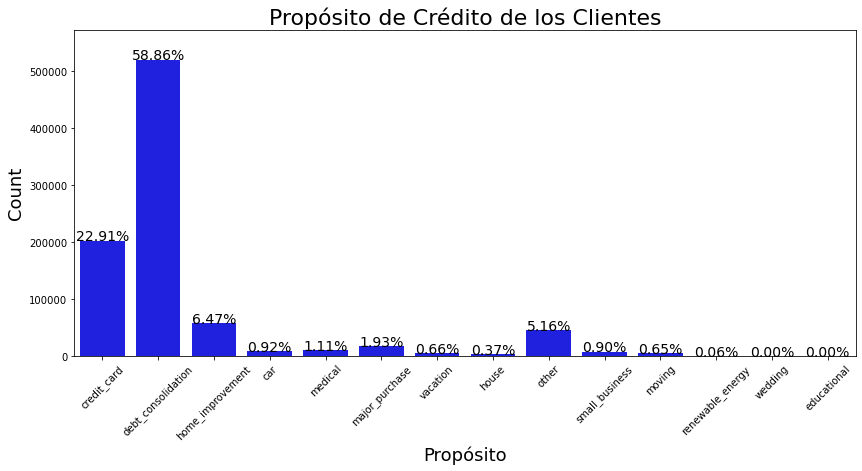

In [41]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=lendingclub, 
                  color='blue')
g.set_title("Propósito de Crédito de los Clientes", fontsize=22)
g.set_xlabel("Propósito", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

### Distribuciones de la cantidad del préstamo y tipo de interés

In [ ]:
int_numeric = lendigclub["int_rate"].str.strip("%")
int_numeric = pd.to_numeric(int_numeric)
lendigclub["int_rate"] = int_numeric/100

lendigclub['int_round'] = lendigclub['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(lendigclub["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=lendigclub, 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

### Estado de verificación

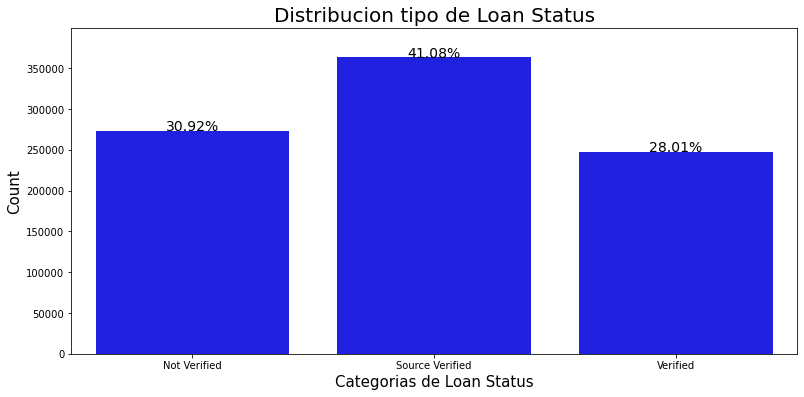

In [43]:
plt.figure(figsize = (13,6))

g = sns.countplot(x="verification_status", data=lendingclub, 
                  color='blue')
g.set_xlabel("Categorias de Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Distribucion tipo de Loan Status", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

### INSTALLMENT Column

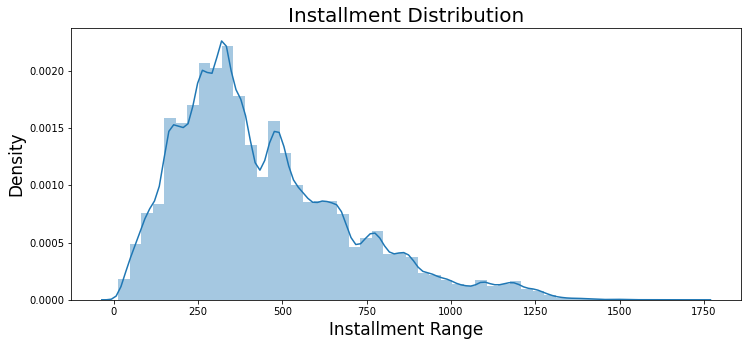

In [31]:
plt.figure(figsize=(12,5))

sns.distplot(lendingclub['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

### Installment by Loan Status

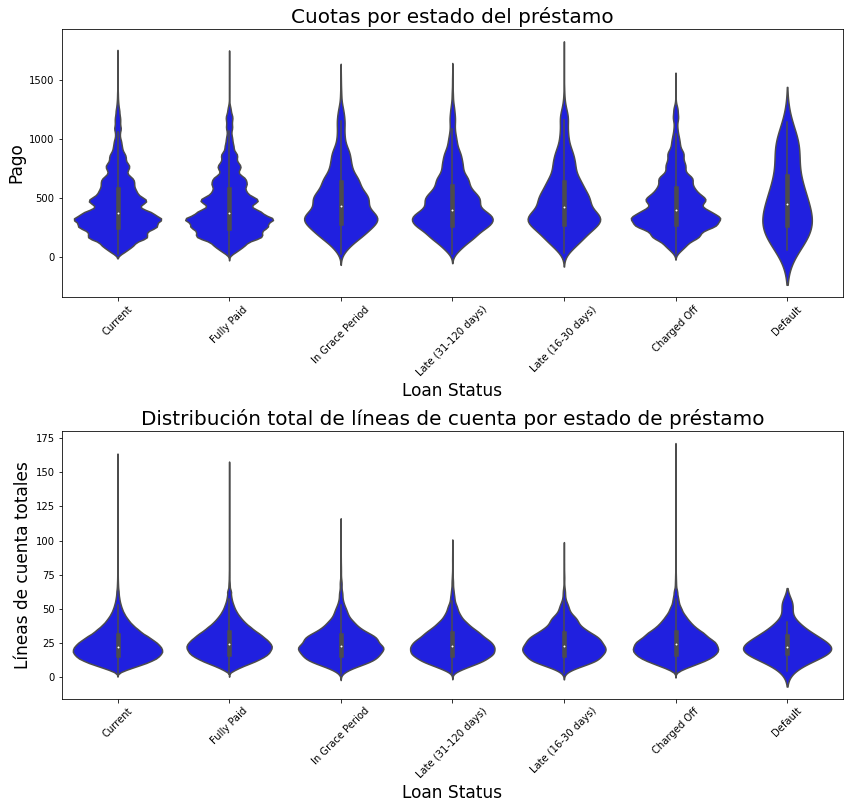

In [44]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x='loan_status', y="installment",
                   data=lendingclub, color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=17)
g.set_ylabel("Pago", fontsize=17)
g.set_title("Cuotas por estado del préstamo", fontsize=20)

plt.subplot(212)
g1 = sns.violinplot(x='loan_status', y="total_acc",
                   data=lendingclub, color='blue')
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status", fontsize=17)
g1.set_ylabel("Líneas de cuenta totales", fontsize=17)
g1.set_title("Distribución total de líneas de cuenta por estado de préstamo", fontsize=20)

plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

### Terms

In [48]:
Distribución del monto del préstamo del préstamo de Lending Club por valores a plazo

order_sub = lendingclub.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,18))

plt.suptitle('Term Distributions \n# Count, Interest Rate and Loan Amount #', fontsize=22)

plt.subplot(311)
g = sns.countplot(x="term", data=lendingclub,color='blue')
g.set_xlabel("Term Values", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_title("Lending Club Loan \nTerm Count Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.violinplot(x='term', y="int_rate",data=lendingclub )
g1.set_xlabel("Term Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan \nInterest Rate Distribution by Term Values", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="term", y="loan_amnt", data=lendingclub)
g2.set_xlabel("Term Values", fontsize=17)
g2.set_ylabel("Loan Amount", fontsize=17)
g2.set_title("Lending Club Loan \nLoan Amount Distribution by Term Values", fontsize=20)

plt.subplots_adjust(hspace = 0.4, top = 0.9)

plt.show()

AttributeError: Can only use .str accessor with string values!

### Grades

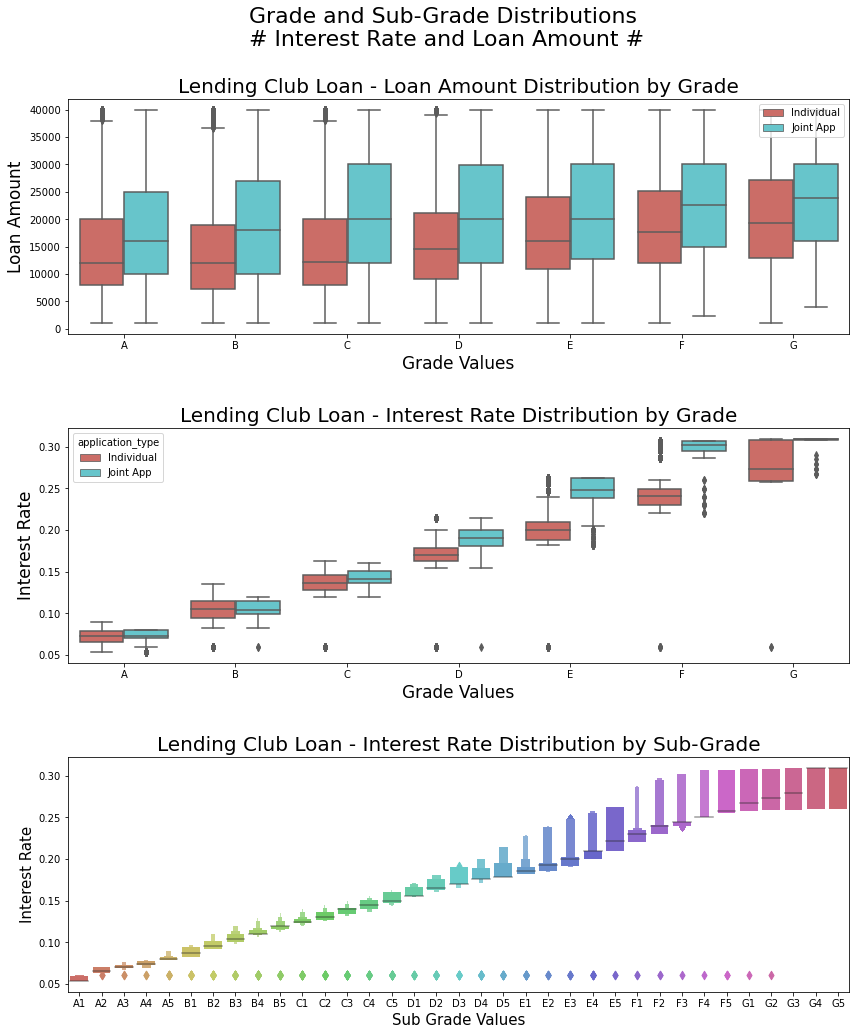

In [49]:
order_sub = lendingclub.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,16))

plt.suptitle('Grade and Sub-Grade Distributions \n# Interest Rate and Loan Amount #', fontsize=22)

plt.subplot(311)
g = sns.boxplot(x="grade", y="loan_amnt", data=lendingclub,
                palette="hls", hue="application_type", 
                order=["A",'B','C','D','E','F', 'G'])
g.set_xlabel("Grade Values", fontsize=17)
g.set_ylabel("Loan Amount", fontsize=17)
g.set_title("Lending Club Loan - Loan Amount Distribution by Grade", fontsize=20)
g.legend(loc='upper right')

plt.subplot(312)
g1 = sns.boxplot(x='grade', y="int_rate",data=lendingclub, 
               hue="application_type", palette = "hls",  
               order=["A",'B','C','D','E','F', 'G'])
g1.set_xlabel("Grade Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan - Interest Rate Distribution by Grade", fontsize=20)

plt.subplot(313)
g2 = sns.boxenplot(x="sub_grade", y="int_rate", data=lendingclub, 
                   palette="hls", order=order_sub)
g2.set_xlabel("Sub Grade Values", fontsize=15)
g2.set_ylabel("Interest Rate", fontsize=15)
g2.set_title("Lending Club Loan - Interest Rate Distribution by Sub-Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()